In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv(r'C:\Users\My PC\Downloads\creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

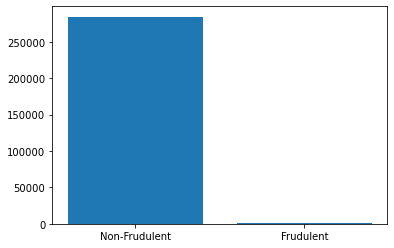

In [14]:
plt.bar(height=[df['Class'].value_counts()[0],df['Class'].value_counts()[1]],x=['Non-Frudulent','Frudulent'])
plt.show()

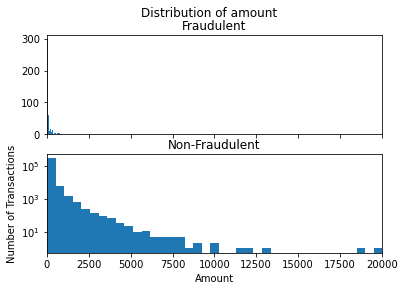

In [70]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Distribution of amount')
bins = 50

fraud_amount_val = df[df['Class']==1]['Amount'].values
non_fraud_amount_val = df[df['Class']==0]['Amount'].values

ax1.hist(fraud_amount_val, bins = bins)
ax1.set_title('Fraudulent')
ax2.hist(non_fraud_amount_val, bins = bins)
ax2.set_title('Non-Fraudulent')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')

Text(0, 0.5, 'Amount')

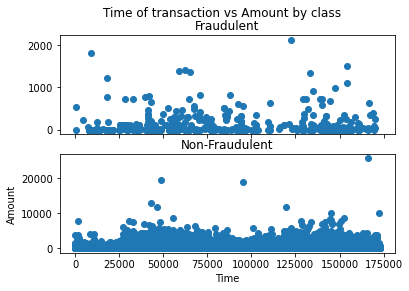

In [68]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Time of transaction vs Amount by class')

fraud_time_val = df[df['Class']==1]['Time'].values
non_fraud_time_val = df[df['Class']==0]['Time'].values

ax1.scatter(fraud_time_val,fraud_amount_val)
ax1.set_title('Fraudulent')
ax2.scatter(non_fraud_time_val,non_fraud_amount_val)
ax2.set_title('Non-Fraudulent')
plt.xlabel('Time')
plt.ylabel('Amount')

In [8]:
sc=StandardScaler()
df['Time']=sc.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount']=sc.fit_transform(df['Amount'].values.reshape(-1,1))

In [9]:
X=df.drop('Class',axis=1)
y=df['Class']
skf=StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
for test, train in skf.split(X,y):
    original_X_train, original_X_test = X.iloc[train],X.iloc[test]
    original_y_train, original_y_test = y.iloc[train],y.iloc[test]

In [21]:
print('Training set {}'.format(original_y_train.value_counts()[0]/original_y_train.value_counts()[1]))
print('Test set {}'.format(original_y_test.value_counts()[0]/original_y_test.value_counts()[1]))

Training set 577.8719512195122
Test set 577.8780487804878


# Under sampling:

Random Forest Classifier:

In [10]:
steps=[('under', RandomUnderSampler()), ('model', RandomForestClassifier(n_estimators=300,random_state=0,max_depth=6))]
pipeline = Pipeline(steps=steps)
skf=StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
accuracy=[]
for test, train in skf.split(original_X_train,original_y_train):
    X_train, X_test = original_X_train.iloc[train],original_X_train.iloc[test]
    y_train, y_test = original_y_train.iloc[train],original_y_train.iloc[test]
    pipeline.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,pipeline.predict(X_test)))
    
print('Training score: {}'.format(np.mean(np.array(accuracy))))
print('Test score: {}'.format(accuracy_score(original_y_test,pipeline.predict(original_X_test))))
print(confusion_matrix(original_y_test,pipeline.predict(original_X_test)))

Training score: 0.9262969400115869
Test score: 0.8381119912362013
[[158824  30720]
 [    18    310]]


Logistic Regression:

In [22]:
steps=[('under', RandomUnderSampler()), ('model', KNeighborsClassifier())]
pipeline = Pipeline(steps=steps)
skf=StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
accuracy=[]
for test, train in skf.split(original_X_train,original_y_train):
    X_train, X_test = original_X_train.iloc[train],original_X_train.iloc[test]
    y_train, y_test = original_y_train.iloc[train],original_y_train.iloc[test]
    pipeline.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,pipeline.predict(X_test)))
    
print('Training score: {}'.format(np.mean(np.array(accuracy))))
print('Test score: {}'.format(accuracy_score(original_y_test,pipeline.predict(original_X_test))))
print(confusion_matrix(original_y_test,pipeline.predict(original_X_test)))

Training score: 0.9861747511455207
Test score: 0.9794071795736075
[[185674   3870]
 [    40    288]]


# Over Sampling:

Random Forest Classifier:

In [12]:
steps=[('over', SMOTE()), ('model', RandomForestClassifier(n_estimators=300,random_state=0,max_depth=6))]
pipeline = Pipeline(steps=steps)
skf=StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
accuracy=[]
for test, train in skf.split(original_X_train,original_y_train):
    X_train, X_test = original_X_train.iloc[train],original_X_train.iloc[test]
    y_train, y_test = original_y_train.iloc[train],original_y_train.iloc[test]
    pipeline.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,pipeline.predict(X_test)))
    
print('Training score: {}'.format(np.mean(np.array(accuracy))))
print('Test score: {}'.format(accuracy_score(original_y_test,pipeline.predict(original_X_test))))
print(confusion_matrix(original_y_test,pipeline.predict(original_X_test)))

Training score: 0.9137567809553905
Test score: 0.963733462543187
[[182708   6836]
 [    50    278]]


Logistic Regression:

In [23]:
steps=[('over', SMOTE()), ('model', KNeighborsClassifier())]
pipeline = Pipeline(steps=steps)
skf=StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
accuracy=[]
for test, train in skf.split(original_X_train,original_y_train):
    X_train, X_test = original_X_train.iloc[train],original_X_train.iloc[test]
    y_train, y_test = original_y_train.iloc[train],original_y_train.iloc[test]
    pipeline.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,pipeline.predict(X_test)))
    
print('Training score: {}'.format(np.mean(np.array(accuracy))))
print('Test score: {}'.format(accuracy_score(original_y_test,pipeline.predict(original_X_test))))
print(confusion_matrix(original_y_test,pipeline.predict(original_X_test)))

Training score: 0.9972928846052561
Test score: 0.9945436925929046
[[188579    965]
 [    71    257]]


# Combinig both over and under sampling:

Random Forest Classifier:

In [24]:
steps=[('under', RandomUnderSampler()),('over', SMOTE()), ('model', RandomForestClassifier(n_estimators=300,random_state=0,max_depth=6))]
pipeline = Pipeline(steps=steps)
skf=StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
accuracy=[]
for test, train in skf.split(original_X_train,original_y_train):
    X_train, X_test = original_X_train.iloc[train],original_X_train.iloc[test]
    y_train, y_test = original_y_train.iloc[train],original_y_train.iloc[test]
    pipeline.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,pipeline.predict(X_test)))
    
print('Training score: {}'.format(np.mean(np.array(accuracy))))
print('Test score: {}'.format(accuracy_score(original_y_test,pipeline.predict(original_X_test))))
print(confusion_matrix(original_y_test,pipeline.predict(original_X_test)))

Training score: 0.9325696529204192
Test score: 0.9261186483525744
[[175547  13997]
 [    31    297]]


Logistic Regression:

In [25]:
steps=[('under', RandomUnderSampler()),('over', SMOTE()), ('model', KNeighborsClassifier())]
pipeline = Pipeline(steps=steps)
skf=StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
accuracy=[]
for test, train in skf.split(original_X_train,original_y_train):
    X_train, X_test = original_X_train.iloc[train],original_X_train.iloc[test]
    y_train, y_test = original_y_train.iloc[train],original_y_train.iloc[test]
    pipeline.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,pipeline.predict(X_test)))
    
print('Training score: {}'.format(np.mean(np.array(accuracy))))
print('Test score: {}'.format(accuracy_score(original_y_test,pipeline.predict(original_X_test))))
print(confusion_matrix(original_y_test,pipeline.predict(original_X_test)))

Training score: 0.9882761889714016
Test score: 0.986206497008511
[[186966   2578]
 [    41    287]]
